## Adding Libraries, Importing Dataset.

In [12]:
options(warn = -1)
library(tidyverse)
library(baseballr)
library(ggthemes) # Themes for ggplot2.
library(ggimage) # Supports images in ggplot2.
library(gt) # Create tables.
library(readr) # Read in datasets.
library(scatterplot3d)
library(reshape)
library(ExcelFunctionsR)

In [3]:
# Custom plot settings.
theme_reach <- function() {
  theme_fivethirtyeight() +
    theme(
      legend.position = "none",
      plot.title = element_text(size = 22, hjust = 0.5, face = "bold"),
      plot.subtitle = element_text(size = 18, hjust = 0.5),
      plot.caption = element_text(size = 16),
      axis.title.x = element_text(size=18, margin = margin(t = 20)),
      axis.title.y = element_text(size=18, margin = margin(r = 20)),
      axis.text = element_text(size = 14),
      strip.text = element_text(size = 16, face = "bold"),
      legend.text = element_text(size = 14)
    )
}

In [4]:
all_data_2021 <- read.csv(file = "C:/Users/chris/Documents/Datasets/BaseballR/2021/2021merged.csv")

## Adding Color Code Column.

In [7]:
logan_all <- all_data_2021 %>%
  filter(pitcher == 669302) %>%
  mutate(color_code = as.factor(pitch_name))

colors <- c("#000000", "#1f78b4", "#e41a1c", "#33a02c")
colors <- colors[as.numeric(logan_all$color_code)]
logan_all$colors <- colors

## 90 deg. (angled top-down) View of Release Points.

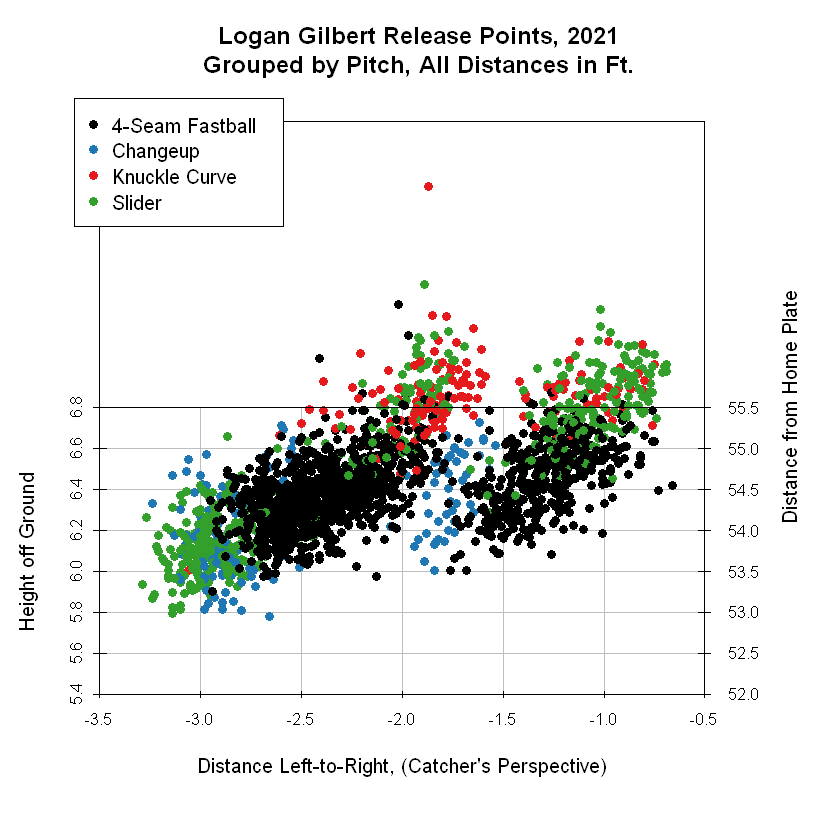

In [10]:
logan_release_plot_90 <- with(logan_all, 
                           scatterplot3d(x = release_pos_x, y = release_pos_y, z = release_pos_z,
                                         pch = 16, color = colors, grid = TRUE,
                                         main = "Logan Gilbert Release Points, 2021\nGrouped by Pitch, All Distances in Ft.",
                                         xlab = "Distance Left-to-Right, (Catcher's Perspective)",
                                         ylab = "Distance from Home Plate",
                                         zlab = "Height off Ground",
                                         angle = 90))
legend("topleft", legend = levels(logan_all$color_code),
       col =  c("#000000", "#1f78b4", "#e41a1c", "#33a02c"), pch = 19)

## 60 deg. View of Release Points.

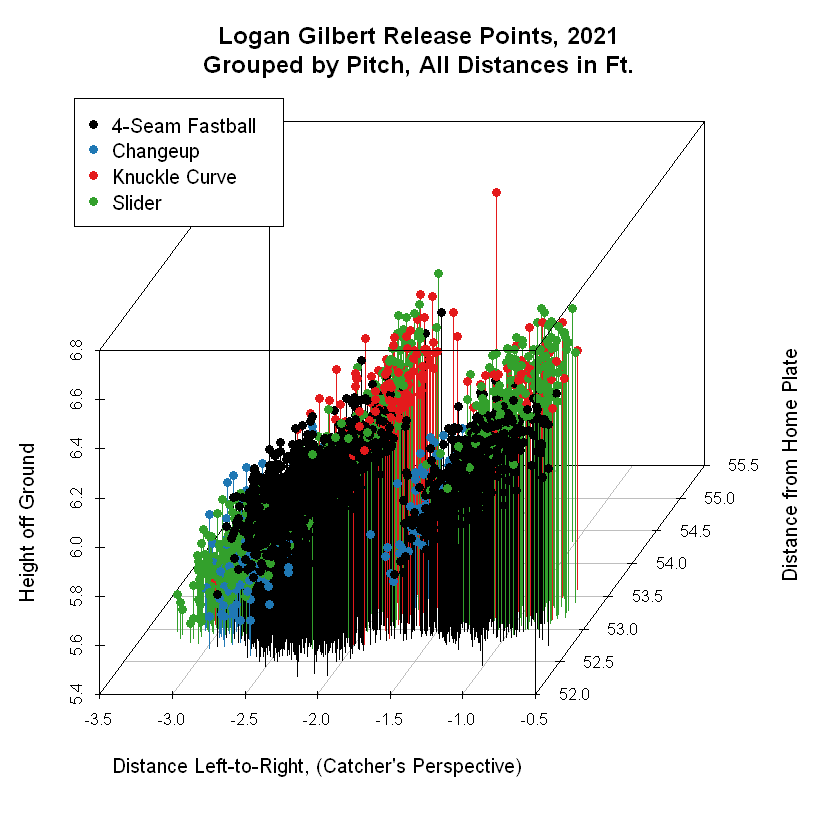

In [9]:
logan_release_plot_60 <- with(logan_all, 
                           scatterplot3d(x = release_pos_x, y = release_pos_y, z = release_pos_z,
                                         pch = 16, type = "h", color = colors, grid = TRUE,
                                         main = "Logan Gilbert Release Points, 2021\nGrouped by Pitch, All Distances in Ft.",
                                         xlab = "Distance Left-to-Right, (Catcher's Perspective)",
                                         ylab = "Distance from Home Plate",
                                         zlab = "Height off Ground",
                                         angle = 60))
legend("topleft", legend = levels(logan_all$color_code),
       col =  c("#000000", "#1f78b4", "#e41a1c", "#33a02c"), pch = 19)

## 2-Dimensional (X, Z) View of Release Points (Catcher's Perspective)

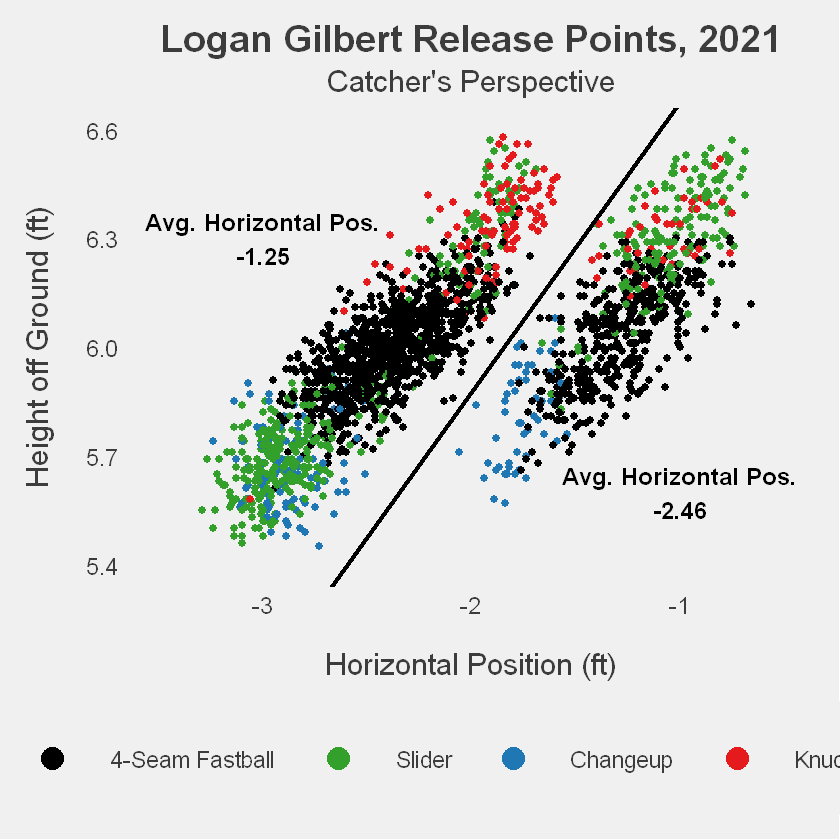

In [13]:
ggplot(data = logan_all,
       aes(x = release_pos_x, y = release_pos_z, color = pitch_name)) +
  geom_point(size = 2) +
  guides(color = guide_legend(override.aes = list(size = 6))) +
  geom_abline(slope = 0.80,
              intercept = 7.48,
              size = 1.25) +
  xlim(-3.5, -0.5) +
  ylim(5.4, 6.6) +
  theme_reach() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank()) +
  theme(legend.position = "bottom") +
  theme(legend.key.size = unit(2, 'cm')) +
  labs(x = "Horizontal Position (ft)",
       y = "Height off Ground (ft)",
       title = "Logan Gilbert Release Points, 2021",
       subtitle = "Catcher's Perspective",
       color = "") +
  annotate("text", x = -1.0, y = 5.6, label = "Avg. Horizontal Pos.\n-2.46", size = 5, fontface = 2) +
  annotate("text", x = -3.0, y = 6.3, label = "Avg. Horizontal Pos.\n-1.25", size = 5, fontface = 2) +
  scale_color_manual(values = setNames(logan_all$colors, logan_all$pitch_name))

## Classify Pitches as 'LEFT' or 'RIGHT' According to their Relation to Line Shown Above.

In [14]:
x1 = -9.35
x2 = 0
y1 = 0
y2 = 7.48
left_or_right = function(x, y, output){
  d = (x - x1)*(y2 - y1) - (y - y1)*(x2 - x1)
  return (ifelse((d > 0), "RIGHT", "LEFT"))
}
logan_all <- logan_all %>%
  mutate(grp_left_or_right = left_or_right(release_pos_x, release_pos_z))

## Find Clear Shift in Release Point X after 8-21-2021.

In [25]:
logan_all_LR <- logan_all %>%
  group_by(game_date.y) %>%
  summarize(left_count = sum(grp_left_or_right == "LEFT"),
            right_count = sum(grp_left_or_right == "RIGHT"))
logan_all_LR

game_date.y,left_count,right_count
<chr>,<int>,<int>
2021-05-13,71,0
2021-05-19,74,0
2021-05-25,78,0
2021-05-31,80,0
2021-06-06,105,0
2021-06-13,91,1
2021-06-19,100,0
2021-06-26,28,0
2021-07-02,101,0


## Compute Average Release Point X Values used in Annotations Above.

In [21]:
logan_pre <- logan_all %>%
  filter(game_date.y <= "2021-08-21")
logan_post <- logan_all %>%
  filter(game_date.y > "2021-08-21")

mean(logan_pre$release_pos_x)
mean(logan_post$release_pos_x)

[1] -2.454718

[1] -1.253393